## Data Exploration

In [ ]:
# Load the appropriate libraries
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, roc_auc_score

pd.set_option("display.max_columns", 100)

import graphviz
import pydot
from io import StringIO

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [ ]:
# Load in the training data
!git clone https://github.com/netrapp/'Machine-Learning-Final-Project-'.git
training_features = pd.read_csv('Machine-Learning-Final-Project-/training_set_features.csv', index_col = "respondent_id")

Cloning into 'Machine-Learning-Final-Project-'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 1.31 MiB | 2.70 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# Make sure data read in correctly
training_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
# See shape of data
training_features.shape

(26707, 35)

In [ ]:
# See the data type of each feature
training_features.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In this dataset, each row corresponds to data about one individual. We have 26,707 individuals in our data. Each column corresponds to information about that individual regrading behavioral questions and demographics. We have 35 features in the dataset. Most of our features are integers, however we have a few that are text strings.

In [ ]:
# Load in the training label data
training_labels = pd.read_csv('Machine-Learning-Final-Project-/training_set_labels.csv', index_col = "respondent_id")

In [ ]:
# Make sure this dataset read in correctly
training_labels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
# See shape of this dataset
training_labels.shape

(26707, 2)

Here we see we also have 26,707 rows in this dataset. This is good becuase it ensures we have labels for each individual in the dataset.

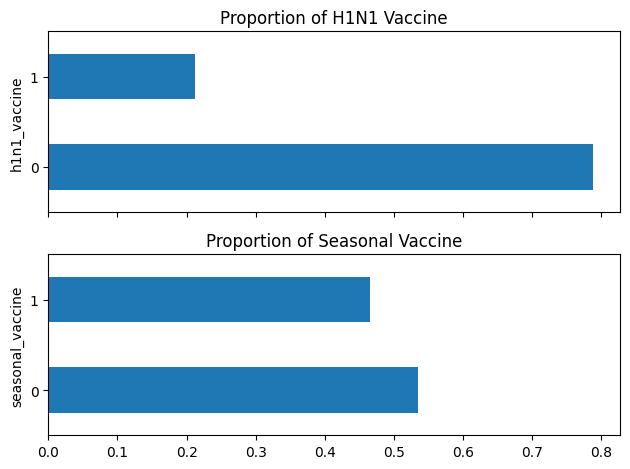

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = training_labels.shape[0]

(training_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(training_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

Here we can see the proportions of how many people got the vaccine vs did not for both vaccines. It looks like there's a lot more individuals choosing not to get the H1N1 vaccine than are. For the flu vaccine, it looks more even between who is getting it and who is not.

In [ ]:
pd.crosstab(
    training_labels["h1n1_vaccine"],
    training_labels["seasonal_vaccine"],
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


This charts shows that most people who didn't get the flu vaccine, also didn't get the H1N1 vaccine. However, about 28 percent go the flu vaccine but didn't get the H1N1. Only 3 percent of people didn't get the flu vaccine but got the H1N1. Also, about 17 percent didn't vaccinate at all.

In [ ]:
# Combine both datasets into one
joined_df = training_features.join(training_labels)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

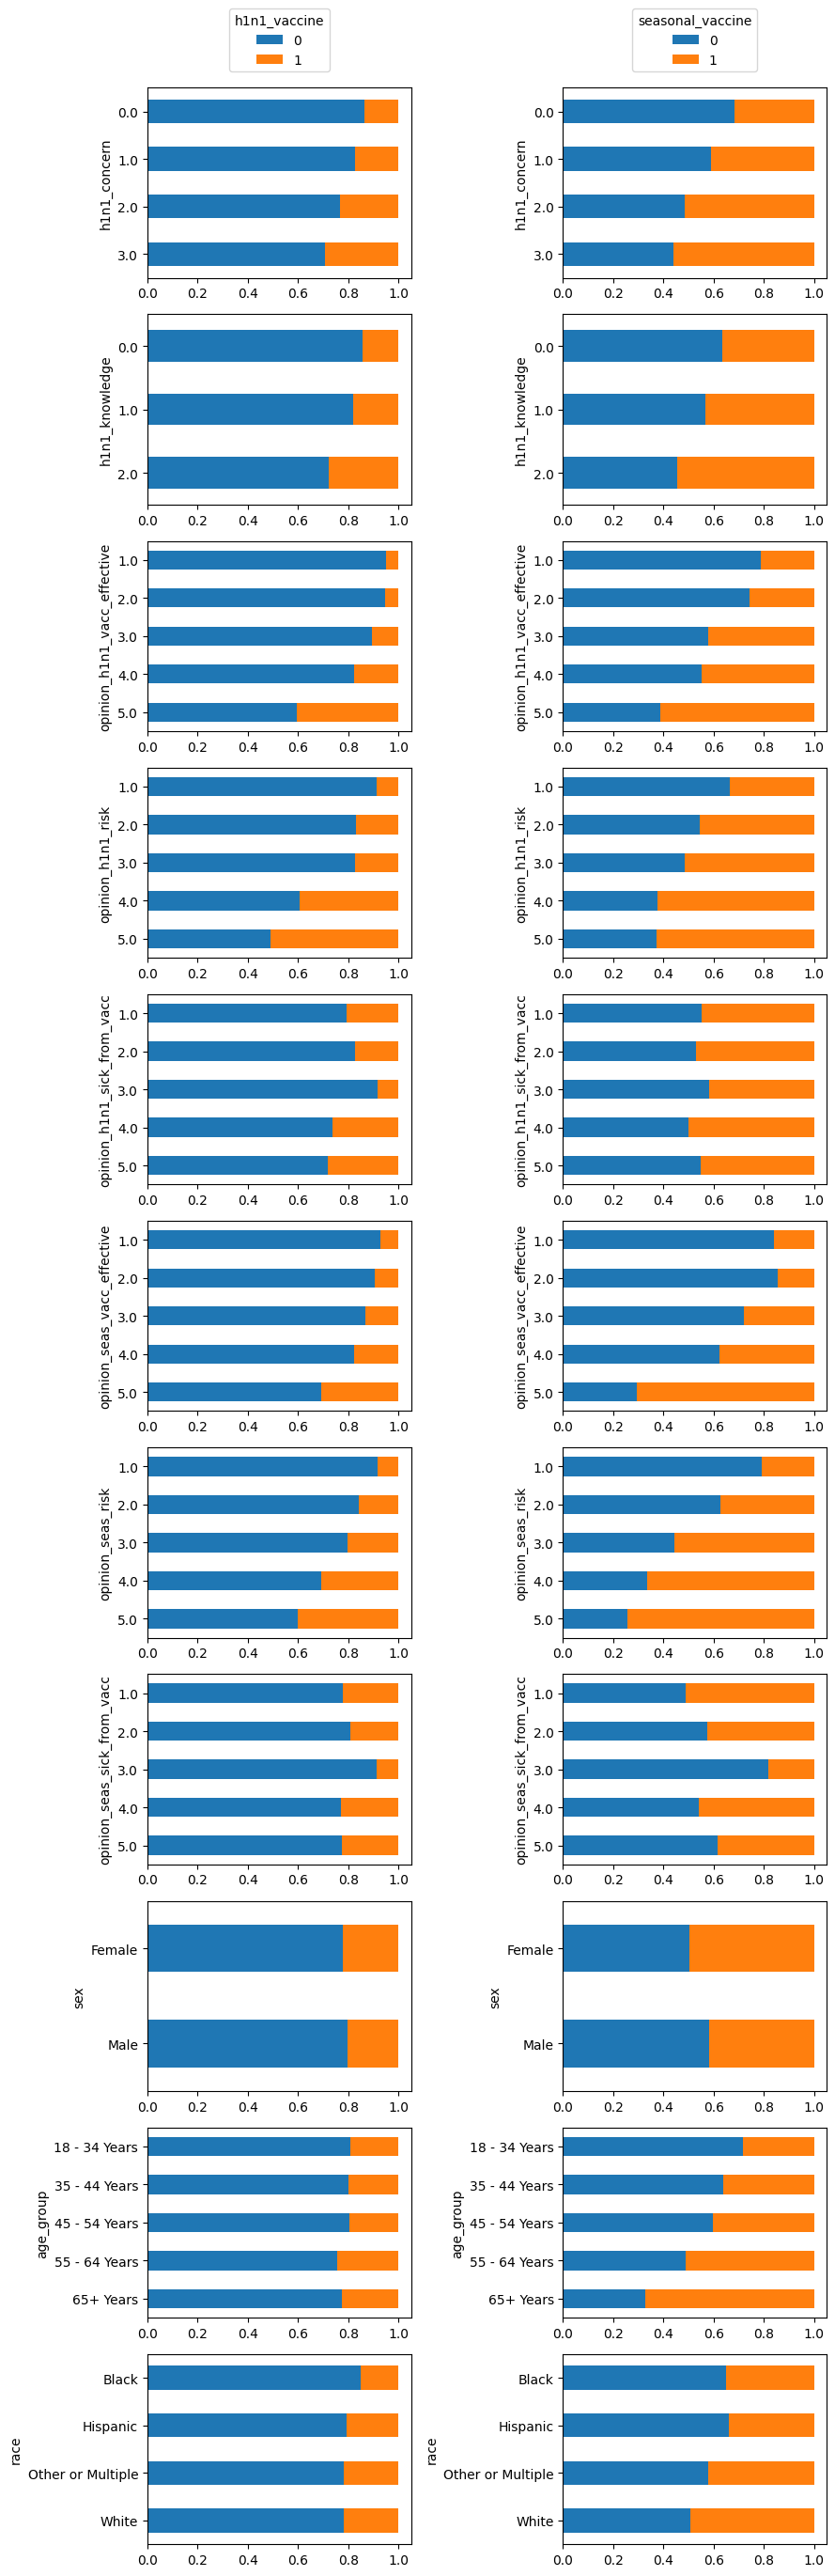

In [ ]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

## Data Cleaning

Not all of our data is complete, so we'll address that here by using a K-Nearest neighbors approach.

We have several categorical variables, so we'll need to convert those into dummies.

In [ ]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
# Drop columns with more than 20 percent of values missing
joined_df = joined_df.drop(columns=['health_insurance','employment_industry','employment_occupation'])

In [ ]:
# Convert categorial into dummy variables
col_types = joined_df.columns.to_series().groupby(joined_df.dtypes).groups
numerics = list(joined_df.select_dtypes(include=['float64', 'int64']).columns)
factors = list(joined_df.select_dtypes(include=['object']).columns)
joined_df_numcols = joined_df[numerics].drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
joined_df_faccols = joined_df[factors]
dummies = pd.get_dummies(joined_df_faccols, drop_first=True)
joined_df_numcols_sc_0 = scale(joined_df_numcols)
joined_df_numcols_sc = pd.DataFrame(data=joined_df_numcols_sc_0, columns=joined_df_numcols.columns, index=dummies.index)
joined_df_sc = pd.concat([joined_df_numcols_sc, dummies], axis=1)
joined_df_sc = pd.concat([joined_df_sc, joined_df[['h1n1_vaccine', 'seasonal_vaccine']]], axis=1)
joined_df_sc = joined_df_sc.rename(columns={'h1n1_vaccine': 'Y1', 'seasonal_vaccine': 'Y2'})
joined_df_sc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,Y1,Y2
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.679436,-2.042478,-0.22661,-1.626185,-0.272201,-2.175870,-0.747788,1.401639,0.690311,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,-0.844361,-1.044380,-0.262463,-1.864614,-1.241246,-0.088611,-1.176654,-0.575963,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1.517658,1.193048,-0.22661,0.614936,-0.272201,0.459586,-0.747788,1.401639,0.690311,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,1.140915,1.289315,1.205168,-0.023916,-0.519239,1.411849,-1.176654,-0.575963,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.679436,-0.424715,-0.22661,0.614936,-0.272201,-2.175870,-0.747788,-0.713450,-1.448623,NaN,NaN,1.590697,-0.300041,-0.354995,-0.844361,-1.044380,-0.996279,-0.023916,-1.241246,-0.088611,1.477953,-0.575963,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.679436,-0.424715,-0.22661,0.614936,-0.272201,0.459586,1.337277,-0.713450,-1.448623,-0.531568,1.425742,1.590697,-0.300041,-0.354995,-0.844361,0.511417,1.938984,0.896433,0.924774,-0.838841,-1.176654,-0.575963,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,0.419111,-0.424715,-0.22661,0.614936,-0.272201,0.459586,1.337277,-0.713450,0.690311,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,-0.844361,0.511417,-0.262463,-0.944265,-1.241246,1.411849,0.150650,-0.575963,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
# Impute missing values
imputed_data = knn_imputer.fit_transform(joined_df_sc)

# Convert back to DataFrame if needed
imputed_df = pd.DataFrame(imputed_data, columns=joined_df_sc.columns)

In [ ]:
imputed_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,Y1,Y2
0,-0.679436,-2.042478,-0.22661,-1.626185,-0.272201,-2.175870,-0.747788,1.401639,0.690311,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,-0.844361,-1.044380,-0.262463,-1.864614,-1.241246,-0.088611,-1.176654,-0.575963,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.517658,1.193048,-0.22661,0.614936,-0.272201,0.459586,-0.747788,1.401639,0.690311,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,1.140915,1.289315,1.205168,-0.023916,-0.519239,1.411849,-1.176654,-0.575963,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.679436,-0.424715,-0.22661,0.614936,-0.272201,-2.175870,-0.747788,-0.713450,-1.448623,-0.531568,-0.275963,1.590697,-0.300041,-0.354995,-0.844361,-1.044380,-0.996279,-0.023916,-1.241246,-0.088611,1.477953,-0.575963,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.679436,-0.424715,-0.22661,0.614936,-0.272201,0.459586,1.337277,-0.713450,-1.448623,-0.531568,1.425742,1.590697,-0.300041,-0.354995,-0.844361,0.511417,1.938984,0.896433,0.924774,-0.838841,-1.176654,-0.575963,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.419111,-0.424715,-0.22661,0.614936,-0.272201,0.459586,1.337277,-0.713450,0.690311,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,-0.844361,0.511417,-0.262463,-0.944265,-1.241246,1.411849,0.150650,-0.575963,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.419111,-2.042478,-0.22661,0.614936,-0.272201,-2.175870,-0.747788,1.401639,-1.448623,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,-0.844361,-1.044380,-0.996279,0.896433,-0.519239,-0.088611,-1.176654,-0.575963,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
26703,-0.679436,1.193048,-0.22661,0.614936,-0.272201,0.459586,-0.747788,-0.713450,-1.448623,1.881227,1.425742,-0.628655,-0.300041,2.816940,0.148277,-0.266482,-0.262463,0.896433,-1.241246,-0.838841,0.150650,-0.575963,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26704,0.419111,1.193048,-0.22661,0.614936,3.673754,0.459586,1.337277,-0.713450,0.690311,-0.531568,-0.701389,-0.628655,-0.300041,-0.354995,0.148277,1.289315,-0.262463,0.896433,0.924774,-0.088611,-1.176654,-0.575963,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [ ]:
# Split the data into a training and validation set so we can compare model performance.
np.random.seed(42)
train, val = train_test_split(imputed_df, test_size=0.33)
X_train = train.drop(columns=['Y1', 'Y2']).values
y1_train = train['Y1'].values
y2_train = train['Y2'].values
y_train = train[['Y1','Y2']].values

X_val = val.drop(columns=['Y1', 'Y2']).values
y1_val = val['Y1'].values
y2_val = val['Y2'].values
y_val = val[['Y1','Y2']].values
X_train.shape

(17893, 50)

## Building Predictive Models

#### Logistic Regression Model

In [ ]:
# Logistic Regression for y1
model_y1 = LogisticRegression()
model_y1.fit(X_train, y1_train)

# Logistic Regression for y2
model_y2 = LogisticRegression()
model_y2.fit(X_train, y2_train)

LogisticRegression()

In [ ]:
# Make predictions on validation set
y1_pred = model_y1.predict(X_val)
y2_pred = model_y2.predict(X_val)

In [ ]:
y1_prob = model_y1.predict_proba(X_val)[:, 1]
y2_prob = model_y2.predict_proba(X_val)[:, 1]

In [ ]:
# Compute ROC curve and ROC area for each class
fpr_y1, tpr_y1, _ = roc_curve(y1_val, y1_prob)
roc_auc_y1 = auc(fpr_y1, tpr_y1)

fpr_y2, tpr_y2, _ = roc_curve(y2_val, y2_prob)
roc_auc_y2 = auc(fpr_y2, tpr_y2)

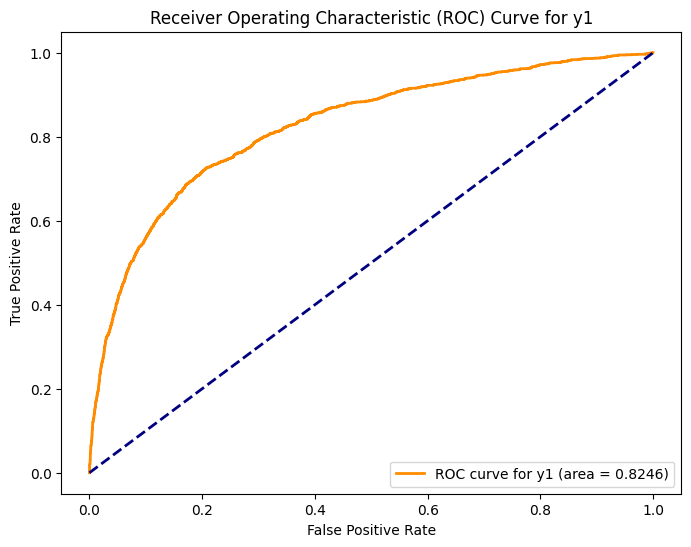

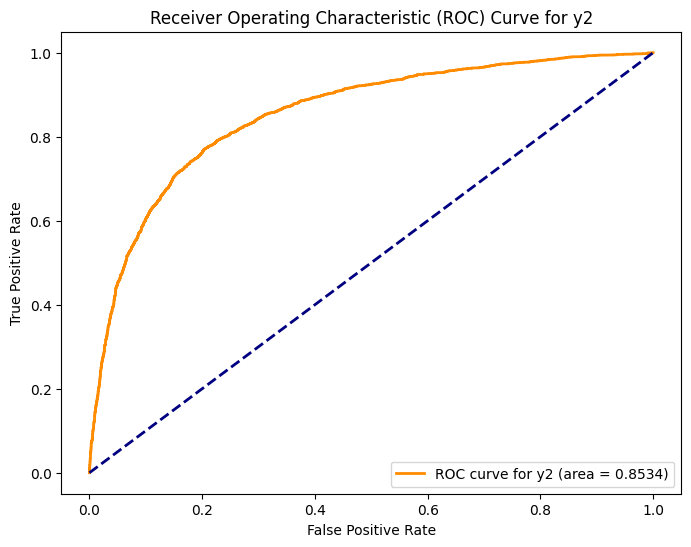

In [ ]:
# Plot ROC curve for y1
plt.figure(figsize=(8, 6))
plt.plot(fpr_y1, tpr_y1, color='darkorange', lw=2, label=f'ROC curve for y1 (area = {roc_auc_y1:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for y1')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve for y2
plt.figure(figsize=(8, 6))
plt.plot(fpr_y2, tpr_y2, color='darkorange', lw=2, label=f'ROC curve for y2 (area = {roc_auc_y2:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for y2')
plt.legend(loc='lower right')
plt.show()

#### Lasso Regression Model

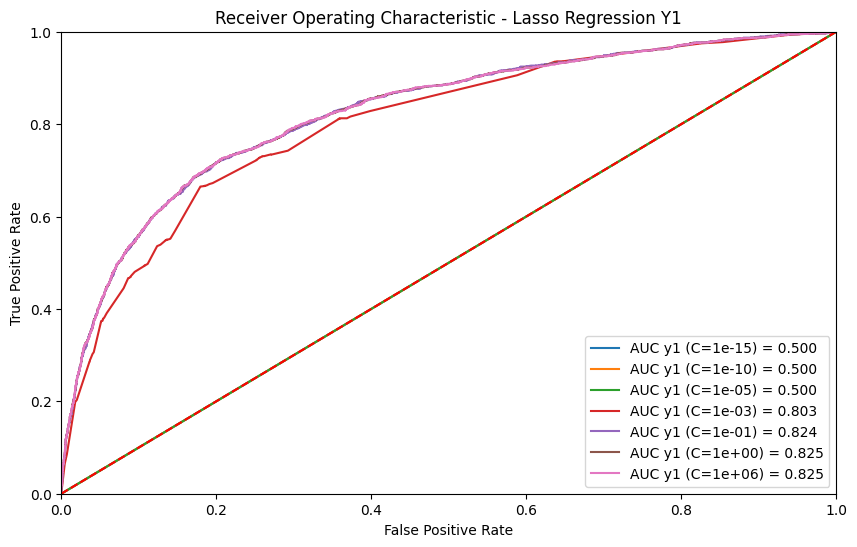

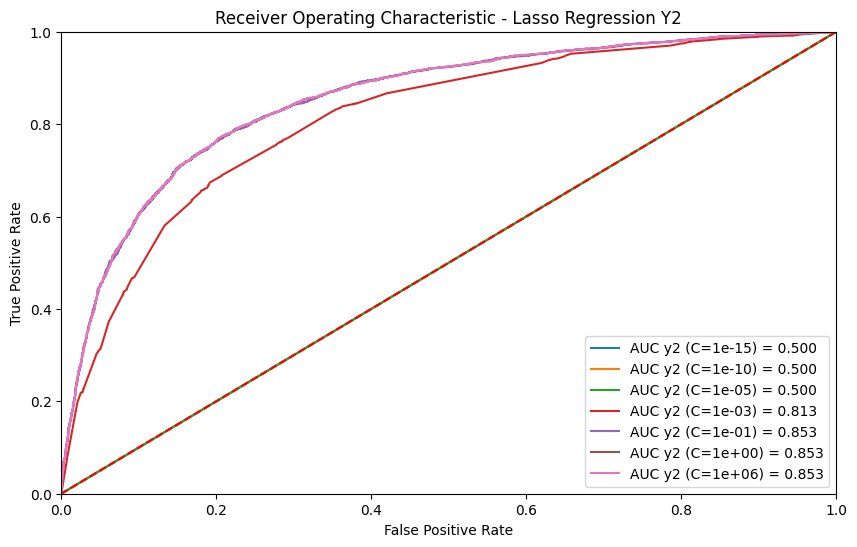

In [ ]:
# Define a range of C values to try
C_values = [1e-15, 1e-10, 1e-5, 1e-3, 1e-1, 1, 1e6]

# Initialize lists to store results
roc_aucs_y1 = []
roc_aucs_y2 = []

# Iterate over different values of C for Y1
plt.figure(figsize=(10, 6))
for C_val in C_values:
    # Cap the top value of C at 1,000,000
    if C_val == 1e6:
        C_val = 1e6

    # Logistic Lasso regression for Y1 with explicit C parameter and saga solver
    logistic_lasso_y1 = LogisticRegression(penalty='l1', C=C_val, solver='liblinear')
    logistic_lasso_y1.fit(X_train, y1_train)

    # Make predictions for Y1
    y1_lasso_prob = logistic_lasso_y1.predict_proba(X_val)[:, 1]

    # Compute ROC curve and AUC for Y1
    fpr_y1, tpr_y1, _ = roc_curve(y1_val, y1_lasso_prob)
    roc_auc_y1 = auc(fpr_y1, tpr_y1)
    roc_aucs_y1.append(roc_auc_y1)

    # Plot ROC curve for Y1
    plt.plot(fpr_y1, tpr_y1, label=f'AUC y1 (C={C_val:.0e}) = {roc_auc_y1:.3f}')

plt.title('Receiver Operating Characteristic - Lasso Regression Y1')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Iterate over different values of C for Y2
plt.figure(figsize=(10, 6))
for C_val in C_values:
    # Cap the top value of C at 1,000,000
    if C_val == 1e6:
        C_val = 1e6

    # Logistic Lasso regression for Y2 with explicit C parameter and saga solver
    logistic_lasso_y2 = LogisticRegression(penalty='l1', C=C_val, solver='liblinear')
    logistic_lasso_y2.fit(X_train, y2_train)

    # Make predictions for Y2
    y2_lasso_prob = logistic_lasso_y2.predict_proba(X_val)[:, 1]

    # Compute ROC curve and AUC for Y2
    fpr_y2, tpr_y2, _ = roc_curve(y2_val, y2_lasso_prob)
    roc_auc_y2 = auc(fpr_y2, tpr_y2)
    roc_aucs_y2.append(roc_auc_y2)

    # Plot ROC curve for Y2
    plt.plot(fpr_y2, tpr_y2, label=f'AUC y2 (C={C_val:.0e}) = {roc_auc_y2:.3f}')

plt.title('Receiver Operating Characteristic - Lasso Regression Y2')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### Random Forest Classifier Model

In [ ]:
rf1 = RandomForestClassifier(criterion = 'entropy', max_features = 8, n_estimators=500, min_samples_split = 5, random_state=42, min_impurity_decrease = .000001)
rf1.fit(X_train, y1_train)

RandomForestClassifier(criterion='entropy', max_features=8,
                       min_impurity_decrease=1e-06, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [ ]:
rf2 = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', min_samples_split = 5, n_estimators=500, random_state=42, min_impurity_decrease = .00000001)
rf2.fit(X_train, y2_train)

RandomForestClassifier(criterion='entropy', min_impurity_decrease=1e-08,
                       min_samples_split=5, n_estimators=500, random_state=42)

In [ ]:
y1_rf_proba = rf1.predict_proba(X_val)[:, 1]
y2_rf_proba = rf2.predict_proba(X_val)[:, 1]

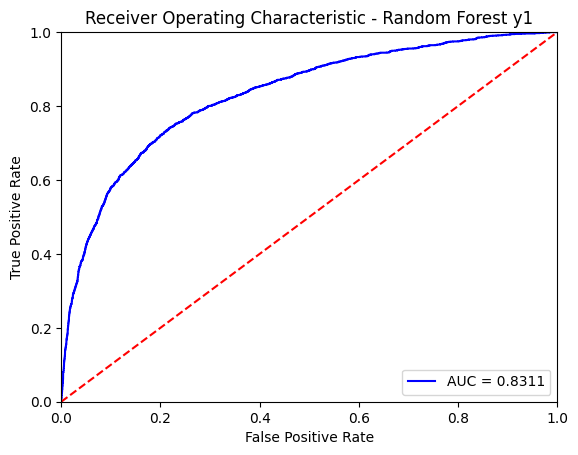

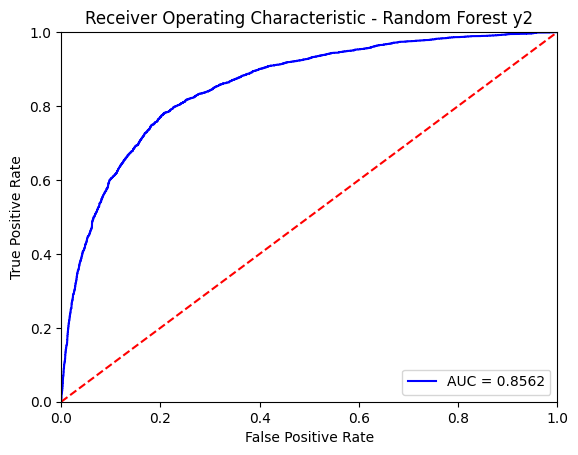

In [ ]:
fpr, tpr, threshold = roc_curve(y1_val, y1_rf_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Random Forest y1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, threshold = roc_curve(y2_val, y2_rf_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Random Forest y2')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Gradient Boosted Trees Model

In [ ]:
gb1 = GradientBoostingClassifier(n_estimators=5000, subsample =.1, learning_rate=0.005,random_state=1, max_depth = 4)
gb1.fit(X_train, y1_train)

GradientBoostingClassifier(learning_rate=0.005, max_depth=4, n_estimators=5000,
                           random_state=1, subsample=0.1)

In [ ]:
gb2 = GradientBoostingClassifier(n_estimators=5000, subsample =.1, learning_rate=0.005,random_state=1, max_depth = 3)
gb2.fit(X_train, y2_train)

GradientBoostingClassifier(learning_rate=0.005, n_estimators=5000,
                           random_state=1, subsample=0.1)

In [ ]:
y1_gb_proba = gb1.predict_proba(X_val)[:, 1]
y2_gb_proba = gb2.predict_proba(X_val)[:, 1]

In [ ]:
roc_auc_score(y1_val, y1_gb_proba)

0.834534349102375

In [ ]:
roc_auc_score(y2_val, y2_gb_proba)

0.862198002268547

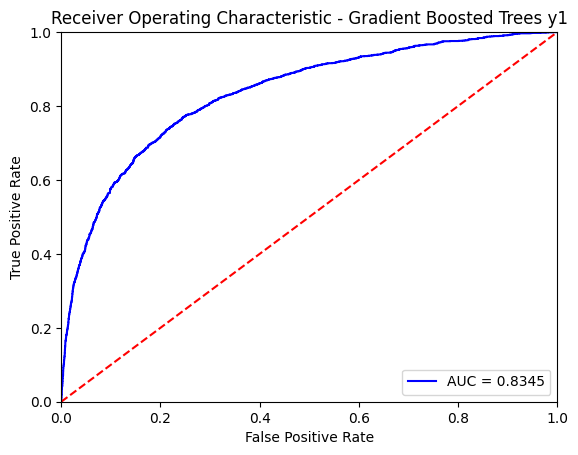

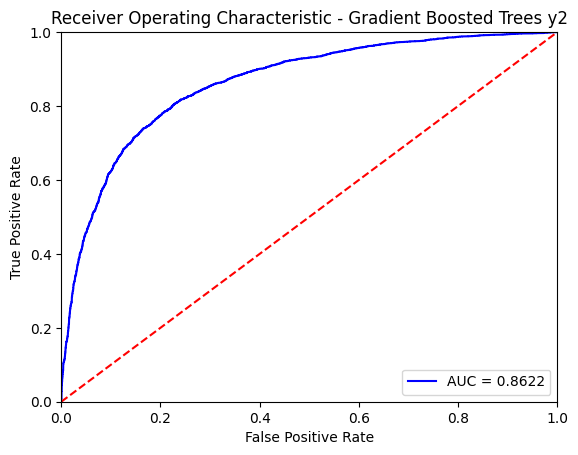

In [ ]:
fpr, tpr, threshold = roc_curve(y1_val, y1_gb_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Gradient Boosted Trees y1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, threshold = roc_curve(y2_val, y2_gb_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Gradient Boosted Trees y2')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Neural Net Model

In [ ]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(25, activation="relu", name="dense_1")(inputs)
x = layers.Dense(37, activation="softplus", name="dense_2")(x)
x = layers.Dense(25, activation="softplus", name="dense_3")(x)
x = layers.Dense(12, activation="relu", name="dense_4")(x)
x = layers.Dense(7, activation="softplus", name="dense_5")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
nn1 = keras.Model(inputs=inputs, outputs=outputs)
nn1.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=[keras.metrics.MeanSquaredError(),'accuracy'],
)

In [ ]:
history = nn1.fit(
  X_train,
  y1_train,
  batch_size=100,
  epochs=10,
)

Epoch 1/10
179/179 [==============================] - 2s 2ms/step - loss: 0.5300 - mean_squared_error: 0.1798 - accuracy: 0.7071
Epoch 2/10
179/179 [==============================] - 1s 3ms/step - loss: 0.3931 - mean_squared_error: 0.1231 - accuracy: 0.8286
Epoch 3/10
179/179 [==============================] - 1s 4ms/step - loss: 0.3841 - mean_squared_error: 0.1200 - accuracy: 0.8326
Epoch 4/10
179/179 [==============================] - 1s 3ms/step - loss: 0.3810 - mean_squared_error: 0.1189 - accuracy: 0.8371
Epoch 5/10
179/179 [==============================] - 1s 4ms/step - loss: 0.3792 - mean_squared_error: 0.1182 - accuracy: 0.8368
Epoch 6/10
179/179 [==============================] - 1s 4ms/step - loss: 0.3767 - mean_squared_error: 0.1174 - accuracy: 0.8384
Epoch 7/10
179/179 [==============================] - 1s 3ms/step - loss: 0.3755 - mean_squared_error: 0.1170 - accuracy: 0.8392
Epoch 8/10
179/179 [==============================] - 0s 3ms/step - loss: 0.3735 - mean_squared_e

In [ ]:
y1_nn_proba = nn1.predict(X_val)

276/276 [==============================] - 1s 1ms/step


In [ ]:
roc_auc_score(y1_val, y1_nn_proba)

0.8253846898466051

In [ ]:
inputs = keras.Input(shape=(50,))
x = layers.Dense(25, activation="relu", name="dense_1")(inputs)
x = layers.Dense(37, activation="softplus", name="dense_2")(x)
x = layers.Dense(25, activation="softplus", name="dense_3")(x)
x = layers.Dense(12, activation="relu", name="dense_4")(x)
x = layers.Dense(7, activation="softplus", name="dense_5")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
nn2 = keras.Model(inputs=inputs, outputs=outputs)
nn2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=[keras.metrics.MeanSquaredError(),'accuracy'],
)

In [ ]:
history = nn2.fit(
  X_train,
  y2_train,
  batch_size=100,
  epochs=10,
)

Epoch 1/10
179/179 [==============================] - 2s 2ms/step - loss: 0.6034 - mean_squared_error: 0.2087 - accuracy: 0.6732
Epoch 2/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4951 - mean_squared_error: 0.1620 - accuracy: 0.7666
Epoch 3/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4880 - mean_squared_error: 0.1591 - accuracy: 0.7724
Epoch 4/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4833 - mean_squared_error: 0.1573 - accuracy: 0.7732
Epoch 5/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4803 - mean_squared_error: 0.1562 - accuracy: 0.7756
Epoch 6/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4772 - mean_squared_error: 0.1552 - accuracy: 0.7776
Epoch 7/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4755 - mean_squared_error: 0.1544 - accuracy: 0.7790
Epoch 8/10
179/179 [==============================] - 0s 2ms/step - loss: 0.4731 - mean_squared_e

In [ ]:
y2_nn_proba = nn2.predict(X_val)

276/276 [==============================] - 0s 1ms/step


In [ ]:
roc_auc_score(y2_val, y2_nn_proba)

0.8546319365387447

<ipython-input-44-85beeedf9fd1>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc , color = 'rebeccapurple')


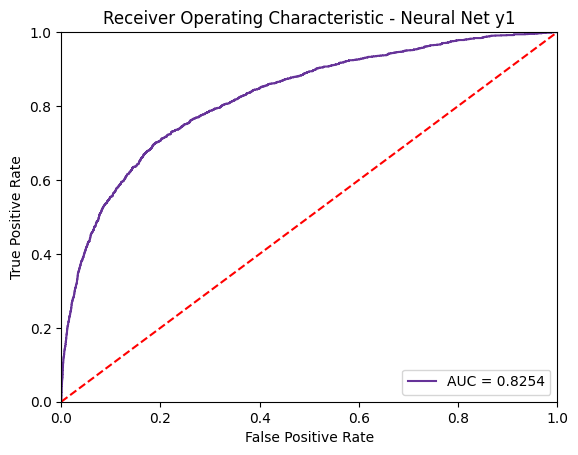

<ipython-input-44-85beeedf9fd1>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc , color = 'rebeccapurple')


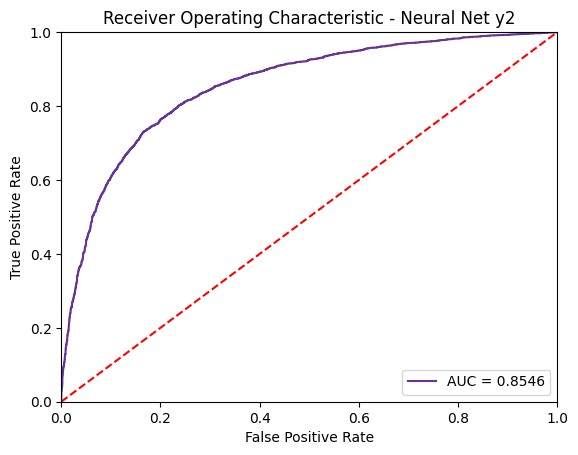

In [ ]:
fpr, tpr, threshold = roc_curve(y1_val, y1_nn_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Neural Net y1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc , color = 'rebeccapurple')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, threshold = roc_curve(y2_val, y2_nn_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Neural Net y2')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc , color = 'rebeccapurple')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using the Gradient Boosted Model to Predict on Test Data

In [ ]:
#Read in the test_features
test_features_df = pd.read_csv('Machine-Learning-Final-Project-/test_set_features.csv',
                               index_col="respondent_id")

In [ ]:
#Clean the test data like we did training
test_features_df = test_features_df.drop(columns=['health_insurance','employment_industry','employment_occupation'])

In [ ]:
# Convert categorial into dummy variables
col_types = test_features_df.columns.to_series().groupby(test_features_df.dtypes).groups
numerics = list(test_features_df.select_dtypes(include=['float64', 'int64']).columns)
factors = list(test_features_df.select_dtypes(include=['object']).columns)
test_features_df_numcols = test_features_df[numerics]
test_features_df_faccols = test_features_df[factors]
dummies = pd.get_dummies(test_features_df_faccols, drop_first=True)
test_features_df_numcols_sc_0 = scale(test_features_df_numcols)
test_features_df_numcols_sc = pd.DataFrame(data=test_features_df_numcols_sc_0, columns=test_features_df_numcols.columns, index=dummies.index)
test_features_df_sc = pd.concat([test_features_df_numcols_sc, dummies], axis=1)
test_features_df_sc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,0.417458,1.192254,-0.228557,0.608475,-0.272830,0.458837,1.358240,-0.713310,0.680095,-0.535208,-0.707452,-0.625213,-0.307349,-0.354251,1.146720,-1.040158,-1.000901,0.900279,-1.241762,-0.853866,0.140130,-0.581521,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
26708,-0.690284,-0.432164,-0.228557,-1.643452,-0.272830,-2.179425,-0.736247,-0.713310,-1.470383,-0.535208,-0.707452,-0.625213,-0.307349,-0.354251,0.154214,-1.040158,-1.000901,-0.022925,-1.241762,-0.853866,2.791843,-0.581521,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
26709,0.417458,1.192254,-0.228557,-1.643452,3.665282,0.458837,1.358240,1.401914,0.680095,-0.535208,-0.707452,-0.625213,-0.307349,-0.354251,1.146720,1.311654,-0.265276,0.900279,0.938441,1.386484,0.140130,-0.581521,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
26710,-0.690284,-0.432164,-0.228557,-1.643452,-0.272830,-2.179425,-0.736247,-0.713310,-1.470383,1.868431,1.413523,1.599455,-0.307349,-0.354251,0.154214,-0.256221,-0.265276,-0.022925,0.938441,-0.107083,0.140130,-0.581521,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
26711,1.525199,-0.432164,4.375267,0.608475,-0.272830,0.458837,1.358240,1.401914,0.680095,-0.535208,-0.707452,-0.625213,-0.307349,2.822855,1.146720,-0.256221,1.205976,-0.022925,0.938441,-0.107083,-1.185726,0.487952,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
# Impute missing values
imputed_test_data = knn_imputer.fit_transform(test_features_df_sc)

In [ ]:
# Convert back to DataFrame if needed
imputed_test_df = pd.DataFrame(imputed_test_data, columns=test_features_df_sc.columns)

In [ ]:
imputed_test_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.417458,1.192254,-0.228557,0.608475,-0.272830,0.458837,1.358240,-0.713310,0.680095,-0.535208,-0.707452,-0.625213,-0.307349,-0.354251,1.146720,-1.040158,-1.000901,0.900279,-1.241762,-0.853866,0.140130,-0.581521,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.690284,-0.432164,-0.228557,-1.643452,-0.272830,-2.179425,-0.736247,-0.713310,-1.470383,-0.535208,-0.707452,-0.625213,-0.307349,-0.354251,0.154214,-1.040158,-1.000901,-0.022925,-1.241762,-0.853866,2.791843,-0.581521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.417458,1.192254,-0.228557,-1.643452,3.665282,0.458837,1.358240,1.401914,0.680095,-0.535208,-0.707452,-0.625213,-0.307349,-0.354251,1.146720,1.311654,-0.265276,0.900279,0.938441,1.386484,0.140130,-0.581521,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.690284,-0.432164,-0.228557,-1.643452,-0.272830,-2.179425,-0.736247,-0.713310,-1.470383,1.868431,1.413523,1.599455,-0.307349,-0.354251,0.154214,-0.256221,-0.265276,-0.022925,0.938441,-0.107083,0.140130,-0.581521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.525199,-0.432164,4.375267,0.608475,-0.272830,0.458837,1.358240,1.401914,0.680095,-0.535208,-0.707452,-0.625213,-0.307349,2.822855,1.146720,-0.256221,1.205976,-0.022925,0.938441,-0.107083,-1.185726,0.487952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,-0.690284,-0.432164,-0.228557,0.608475,-0.272830,0.458837,-0.736247,-0.713310,0.680095,1.868431,1.413523,-0.625213,-0.307349,-0.354251,0.154214,-0.256221,-0.265276,-0.022925,-0.515028,-0.853866,0.140130,0.487952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26704,1.525199,-0.432164,-0.228557,0.608475,-0.272830,0.458837,1.358240,1.401914,0.680095,-0.535208,-0.707452,-0.625213,-0.307349,2.822855,0.154214,-1.040158,-1.000901,0.900279,-0.515028,-0.107083,0.140130,2.626899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
26705,-1.798026,-0.432164,-0.228557,-1.643452,-0.272830,-2.179425,-0.736247,-0.713310,-1.470383,-0.535208,-0.707452,-0.625213,-0.307349,-0.354251,0.154214,0.527717,-1.000901,-0.022925,0.211707,-0.853866,0.140130,-0.581521,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26706,1.525199,-0.432164,-0.228557,0.608475,-0.2728

In [ ]:
#Predicting H1N1 probabilities for the Test data
test1_probas = gb1.predict_proba(imputed_test_df)
test1_probas

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([[0.90476048, 0.09523952],
       [0.96746881, 0.03253119],
       [0.35502107, 0.64497893],
       ...,
       [0.88494022, 0.11505978],
       [0.94370848, 0.05629152],
       [0.52455942, 0.47544058]])

In [ ]:
#Predicting Flu probabilities for the Test data
test2_probas = gb2.predict_proba(imputed_test_df)
test2_probas

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([[0.84983278, 0.15016722],
       [0.96414749, 0.03585251],
       [0.19118434, 0.80881566],
       ...,
       [0.81201044, 0.18798956],
       [0.75565496, 0.24434504],
       [0.42560583, 0.57439417]])

In [ ]:
test1_probas = test1_probas[:, 1].reshape(-1, 1)
test2_probas = test2_probas[:, 1].reshape(-1, 1)

## Creating Submission

In [ ]:
#Read in the submission_format file
submission_df = pd.read_csv('Machine-Learning-Final-Project-/submission_format.csv',
                            index_col="respondent_id")

In [ ]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df_sc.index.values,
                              submission_df.index.values)

In [ ]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test1_probas
submission_df["seasonal_vaccine"] = test2_probas

In [ ]:
#Make sure our probabilities saved into the correct columns
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.095240,0.150167
26708,0.032531,0.035853
26709,0.644979,0.808816
26710,0.741707,0.864012
26711,0.225326,0.437754


In [ ]:
#Export to CSV
submission_df.to_csv('my_submission.csv', index=True)